In [1]:
import pyNN.spiNNaker as sim
import pyNN.utility.plotting as plot
import matplotlib.pyplot as plt


Detected PyNN version 0.9.4 and Neo version 0.6.1


## Setting up the simulator:

In [2]:
sim.setup(timestep=1.0)
sim.set_number_of_neurons_per_core(sim.IF_curr_exp, 100)

2019-05-17 14:42:43 INFO: Read cfg files: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg, /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg, /home/jovyan/.spynnaker.cfg
2019-05-17 14:42:43 INFO: Will search these locations for binaries: /home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/common_model_binaries : /home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/model_binaries
2019-05-17 14:42:43 INFO: Setting time scale factor to 1.0.
2019-05-17 14:42:43 INFO: Setting machine time step to 1000 micro-seconds.


['/home/jovyan/sPyNNakerGit/SpiNNFrontEndCommon/spinn_front_end_common/interface/spinnaker.cfg', '/home/jovyan/sPyNNakerGit/sPyNNaker/spynnaker/pyNN/spynnaker.cfg', '/home/jovyan/.spynnaker.cfg']


## Setting up the populations:

In [3]:
# Define Input neuron
# input = sim.Population(1,sim.SpikeSourceArray(spike_times=[10, 200,210,215, 217, 220, 225, 325, 456]),label="input")
#input = sim.Population(1,sim.SpikeSourceArray(spike_times=[2]),label="input")
#input = sim.Population(1, sim.SpikeSourcePoisson(rate=0), label="Input")
input = sim.Population(1, sim.SpikeSourcePoisson(), label="Input")

# Define output neuron
pop_1 = sim.Population(1,sim.IF_curr_exp(),label="pop_1")

# Connect Input Neuron with Output neuron
input_proj=sim.Projection(input,pop_1,sim.OneToOneConnector(),synapse_type=sim.StaticSynapse(weight=5,delay=1))

pop_1.record(["spikes","v"])
input.record(["spikes"])

## Simulate:

In [4]:
simtime = 100000
sim.run(simtime)

2019-05-17 14:42:43 INFO: Simulating for 100 1000ms timesteps using a hardware timestep of 1000000us
2019-05-17 14:42:43 INFO: Starting execution process
2019-05-17 14:42:48 INFO: Time 0:00:03.640437 taken by SpallocMaxMachineGenerator
Pre allocating resources for Extra Monitor support vertices
|0%                          50%                         100%|
2019-05-17 14:42:59 INFO: Time 0:00:10.515211 taken by PreAllocateResourcesForExtraMonitorSupport
Partitioning graph vertices
|0%                          50%                         100%|
Partitioning graph edges
|0%                          50%                         100%|
2019-05-17 14:43:06 INFO: Time 0:00:07.450796 taken by PartitionAndPlacePartitioner
Created spalloc job 4642680
2019-05-17 14:43:06 INFO: Created spalloc job 4642680
Waiting for board power commands to complete.
2019-05-17 14:43:06 INFO: Waiting for board power commands to complete.
2019-05-17 14:43:15 INFO: Time 0:00:08.945422 taken by SpallocAllocator
2019-05-

Loading Tags
|0%                          50%                         100%|
2019-05-17 14:43:27 INFO: Time 0:00:00.023567 taken by TagsLoader
Writing data
|0%                          50%                         100%|
2019-05-17 14:43:27 INFO: Time 0:00:00.034917 taken by WriteMemoryIOData
Executing data specifications and loading data
|0%                          50%                         100%|
2019-05-17 14:43:27 INFO: Time 0:00:00.133386 taken by HostExecuteDataSpecification
Expanding Synapses
|0%                          50%                         100%|
2019-05-17 14:43:28 INFO: Time 0:00:00.544012 taken by SynapseExpander
Writing fixed route report
|0%                          50%                         100%|
2019-05-17 14:43:28 INFO: Time 0:00:00.047806 taken by FixedRouteFromMachineReport
Loading executables onto the machine
|0%                          50%                         100%|
2019-05-17 14:43:29 INFO: Time 0:00:01.452936 taken by LoadExecutableImages
Reading Routi

100000.0

## Print:

In [5]:
# Input neuron
neo_input=input.get_data(variables=["spikes"])

spikes_input=neo_input.segments[0].spiketrains
print(spikes_input)
print( len(spikes_input[0]) )

# Pop1 neuron
neo_pop1=pop_1.get_data(variables=["spikes","v"])

v_pop1=neo_pop1.segments[0].filter(name='v')[0]
#print(v_pop1)

spikes_pop1=neo_pop1.segments[0].spiketrains
#print(spikes_pop1)

sim.end()

Getting spikes for Input
|0%                          50%                         100%|
Getting spikes for pop_1
|0%                          50%                         100%|
Getting v for pop_1
|0%                          50%                         100%|


[<SpikeTrain(array([  562.,  2233.,  3034.,  3076.,  3349.,  3559.,  3588.,  3677.,
        6548.,  6782.,  8274.,  8474.,  8852., 10026., 12628., 14782.,
       14810., 15433., 17288., 17489., 18621., 21213., 21450., 22432.,
       24776., 26021., 26230., 26682., 27354., 28497., 29072., 30249.,
       30500., 30708., 30848., 31127., 31561., 32139., 32246., 33191.,
       33306., 33310., 34265., 35424., 36563., 37429., 39578., 41090.,
       41191., 41644., 42089., 42744., 43513., 43670., 43915., 44404.,
       44564., 46095., 46610., 47734., 49545., 52095., 52885., 53225.,
       55496., 55806., 56461., 57093., 57764., 59063., 60448., 63617.,
       64793., 65143., 66100., 66170., 66389., 67418., 68147., 68748.,
       69792., 69893., 71407., 71675., 72353., 73021., 73166., 79229.,
       81988., 82625., 83378., 84452., 84859., 84942., 85018., 87646.,
       88267., 89430., 89558., 90687., 90776., 91079., 91099., 91269.,
       91349., 92166., 92231., 92432., 92515., 93832., 95959., 9

## Plot:

<IPython.core.display.Javascript object>


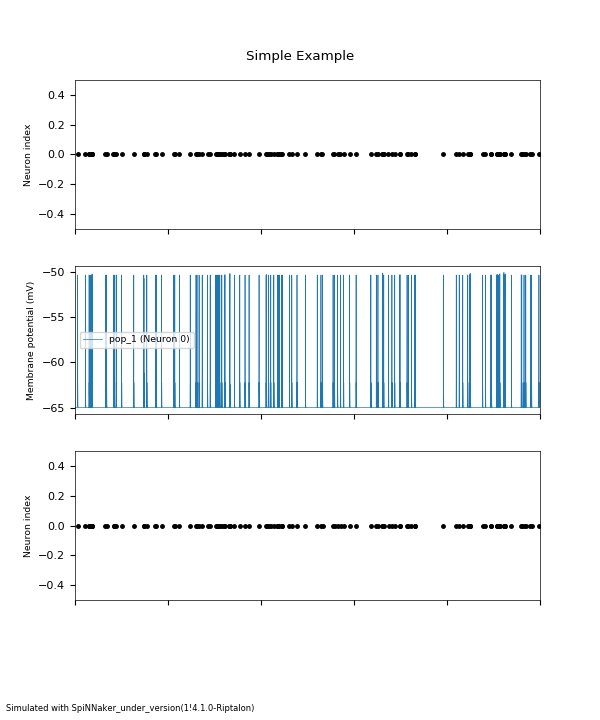

In [6]:
plot.Figure(
    #plot spikes for input population
    plot.Panel(spikes_input, yticks=True, markersize=5, xlim =(0, simtime)),
    
    #plot voltage for first ([0]) neuron
    plot.Panel(v_pop1, ylabel="Membrane potential (mV)", data_labels=[pop_1.label], yticks=True, xlim =(0, simtime)),
    
    #plot spikes for pop1 population
    plot.Panel(spikes_pop1, yticks=True, markersize=5, xlim =(0, simtime)),
    
    title="Simple Example",
    annotations="Simulated with {}".format(sim.name())
)
plt.show()